<a href="https://colab.research.google.com/github/lourencocavalcante/Advanced-Topics-in-Environmental-Modeling/blob/main/INPE_CAP425_ProjetoFinal_PredictRain_Lourenco_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" width = 500 align="left">](https://www.gov.br/inpe/pt-br)

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 300 align="right">](http://www.inpe.br/posgraduacao/cap/)

# **Projeto Final da disciplina de Tópicos Avançados em Modelagem Ambiental (CAP-425)**
**Professores:**
*Dr. Leonardo Bacelar Lima Santos e Dr. Stephan Stephany*

**Aluno:**
*Lourenço José Cavalcante Neto*
<hr style="border:2px solid #0077b9;">

# **<span style="color:#336699">Aplicação de Redes Neurais Artificiais na classificação da chuva a partir de dados meteorológicos obtidos por disdrômetro e radiômetro de microondas</span>**

<hr style="border:2px solid #0077b9;">



# **INTRODUÇÃO**

A previsão ou classificação da chuva segundo a sua intensidade tem sido uma das grandes preocupações mundiais. É um tema que está no radar de diversos pesquisadores e, além disso, tem atraído a atenção de indústrias, governos e de companhias aéreas, por ter relação direta com planejamentos e tomada de decisão.

No campo da meteorologia, é bem conhecido que a variável chuva possui muitas características bem diversas - devido a  sua distribuição espacial e temporal -, que dependem dos mecanismos físicos responsáveis pelas chuvas. Algumas pesquisas indicam que nos encontramos diante de um problema complexo e, por consequência disso, tem sido difícil de resolver. Essa variável é a apresenta maior correlação com eventos naturais adversos, como deslizamentos de terra, inundações, movimentos de massa e avalanches. Esses incidentes afetam a sociedade há anos \cite{b2}.

Uma das possibilidades de solução consistiria em se beneficiar de grandes bases de dados climáticos disponíveis, afim de estudar e classificar a chuva tomando como referência, entre outros fatores, as características relacionadas à sua ocorrência e intensidade. Para este estudo e por se tratar de um ponto focal específico, a intensidade horária média da preciptação em mm/h ficou definida conforme exibido na tabela abaixo:

# **ANÁLISE DO PROBLEMA**
O comportamento dos fenômenos pluviométricos tem relação forte com a precipitação local e repentina. Resultados de pesquisas recentes apontam que o clima e a capacidade humana de predizê-lo com o máximo de precisão possível têm desempenhado um papel crítico em muitos aspectos da vida. De atividades agrícolas ao planejamento para o final de semana de uma família, as companhias aéreas e a tomada de decisões logísticas, a chuva tem grande influência nos planejamentos. Há registros de casos em que o impacto da chuva causou grandes consequências financeiras. Paralelo a isso, é possível perceber que há um grande número de interessados no avanço do conhecimento neste tema e por consquência, aperfeiçoar a capacidade de prever e classificar a chuva com mais precisão. 

A pergunta de pesquisa que se pretende responder neste trabalho é: **em qual nível de acurácia um modelo preditivo consegue classificar a chuva, a partir de dados metorológicos oriundos do Disdrômetro RD80 e do Radiômetro de Microondas MP3000A, como chuva fraca, chuva moderada, chuva forte ou chuva muito forte?**

# **OBJETIVO**
O objetivo deste projeto é criar um modelo de **Rede Neural Artificial** da família **Multilayer Perceptron (MLP)** que seja capaz de auxiliar na classificação da chuva, usando dados de chuva disponíveis.

Este notebook também pode ser visualizado no meu diretório de materiais e atividades da disciplina CAP-425 no Github, [Clicando aqui](https://github.com/lourencocavalcante/Advanced-Topics-in-Environmental-Modeling.git).



---



# **OS DADOS**
Os dados meteorológicos são oriundos de dois equipamentos (**Radiômetro de Microondas "MP3000A"** e o **Disdrômetro "RD80"**), ambos instalados próximo à torre ATTO, em um sítio chamado Campina, na região Amazônica. O MP3000A mede diversas variáveis ambiente, entre elas a radiância no espectro de onda do microonda em diversos canais e estimativas de parâmetros de nuvens. Já o RD80 mede a distribuição das gotas de chuva que chegam à superfície.

Os dados compreendem o período de 17 de março de 2020 a 07 julho 2022.

# **METODOLOGIA**
Visto que já foi realizada uma Análise Exploratória nos dados, tal qual foram observadas, principalmente, as variações nos padrões de chuva, a metodologia que será aplicada para o desenvolvimento deste trabalho será conforme segue abaixo: 
* Importação dos módulos e bibliotecas e o download dos dados para o ambiente de execução; 
* Conversão de dados para o formato que possibilite a realização dos experimentos e testes;
* Divisão dos dados em treinamento, validação e teste;

Por fim, tentaremos aplicar uma abordagem de aprendizado de máquina (Machine Learning), implementando e treinando uma Rede Neural da família multilayer perceptron (MLP) que seja capaz de  classificar a chuva.

# **IMPORTAÇÃO DOS MODULOS DE BIBLIOTÉCAS**
São várias as bibliotecas que podem ser utilizadas para realizar o pré-processamento de dados. Entre elas podemos destacar a biblioteca **Pandas**. Trata-se de uma biblioteca para leitura, manipulação e análise de dados tabulados. Essa biblioteca oferece estruturas de dados e operações para manipular conjuntos massivos de tabelas numéricas e séries temporais de forma otimizada. No python, por convensão, as bibliotecas são importadas conforme podemos ver na célula abaixo:

# **Bibliotecas/Pacotes**

In [153]:
import pandas as pd

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

from keras.models import Sequential
from keras.layers import Activation, Dense

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing

import datetime
import time



print(tf.__version__)

2.9.2


# **OBTENDO OS ARQUIVOS DE DADOS**

Temos 01 arquivo de dados (Dataset):

**df_RD80_MP3000A_for_ClassifierRainfall**: Neste arquivo estão os dados do ambiente próximo à superfície, os dados das medidas dos canais do microonda, as variáveis estimadas associadas a parâmetros de nuvens e dados de medida da distribuição das gotas de chuva que chegam à superfície. Vamos realizar o download do Dataset:

## **Importação, Formatação, Tratamento e Visualização dos dados**

In [154]:
#Vamos baixar os dados do Google Drive para o ambiente de execução do nosso Notebook
!gdown --id 1JnvYuUCODjwIxb8v4LEP0Jk7FL_y1tGt


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1JnvYuUCODjwIxb8v4LEP0Jk7FL_y1tGt
To: /content/df_MP3000A_RD80_final.csv
100% 13.9M/13.9M [00:00<00:00, 176MB/s]


# **PREPROCESSAMENTO E VISUALIZAÇÃO DOS DADOS**

Os dados já foram tratados na fase aneterior deste trabalho. A partir daqui, o primeiro passo é abrir o CSV com o Pandas. Em uma visão inicial dos dados, temos:

In [155]:
#Carregar o Dataset e criar o Dataframe
df_RD80_final = pd.read_csv("/content/df_MP3000A_RD80_final.csv",parse_dates=[0], index_col=[0])
df_RD80_final = df_RD80_final.query("DataQuality == 1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [156]:
#Aqui verificamos o tamanho do Dataset e quantidade de atributos 
print('Tamanho do dataset: ',df_RD80_final.shape[0], ' - Quantidade de atributos: ', df_RD80_final.shape[1])

Tamanho do dataset:  879  - Quantidade de atributos:  68


In [157]:
#Vamos visualizar as primeiras 2 e últimas 2 linhas dos dados
df_RD80_final.loc[df_RD80_final['DataQuality'] == 1].head(n=5).append(df_RD80_final.loc[df_RD80_final['DataQuality'] == 1].tail(n=5))

,Ano,Mes,dia,H,M,S,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,Mean_weight_diameter_mm,...,Very_Heavy_Rain,Without_Rain,Class_Rain_id,Class_Rain,Date,Year,Month,Day_of_week,Time,session
15017,2021,8,15,15,8,0,0.24632,26.14197,0.02150,0.78884,...,0,0,1,Chuva fraca,2021-08-15,2021,Aug,Sunday,15:08:00,Afternoon
21875,2021,10,10,14,2,0,0.00470,0.10926,0.00078,0.41340,...,0,1,0,Não choveu,2021-10-10,2021,Oct,Sunday,14:02:00,Afternoon
23744,2021,11,6,21,11,0,0.06033,9.64492,0.00517,0.83003,...,0,1,0,Não choveu,2021-11-06,2021,Nov,Saturday,21:11:00,Evening
26436,2021,11,8,18,3,0,0.15814,19.52376,0.01257,0.87190,...,0,0,1,Chuva fraca,2021-11-08,2021,Nov,Monday,18:03:00,Afternoon
26467,2021,11,8,18,34,0,2.93372,1107.89575,0.17042,1.33077,...,0,0,2,Chuva moderada,2021-11-08,2021,Nov,Monday,18:34:00,Afternoon
276820,2022,5,29,21,19,0,2.09853,803.45435,0.11511,1.41234,...,0,0,1,Chuva fraca,2022-05-29,2022,May,Sunday,21:19:00,Evening
278093,2022,5,30,18,32,0,1.90520,359.81525,0.12783,1.06897,...,0,0,1,Chuva fraca,2022-05-30,2022,May,Monday,18:32:00,Afternoon
278114,2022,5,30,18,53,0,1.79349,642.84375,0.10457,1.31882,...,0,0,1,Chuva fraca,2022-05-30,2022,May,Monday,18:53:00,Afternoon
278387,2022,5,31,15,50,0,0.07105,3.28447,0.00861,0.55936,...,0,1,0,Não choveu,2022-05-31,2022,May,Tuesday,15:50:00,Afternoon
278678,2022,5,31,20,41,0,9.89920,3345.32812,0.54928,1.37862,...,0,0,2,Chuva moderada,2022-05-31,2022,May,Tuesday,20:41:00,Evening


In [158]:
df_RD80_final.columns

Index(['Ano', 'Mes', 'dia', 'H', 'M', 'S', 'Rain_Intensity_mm_h',
       'radar_reflectivity_1_mm6m3', 'Liquid_watercontent_g_m3',
       'Mean_weight_diameter_mm', 'Time_integration_s', 'N_D1', 'N_D2', 'N_D3',
       'N_D4', 'N_D5', 'N_D6', 'N_D7', 'N_D8', 'N_D9', 'N_D10', 'N_D11',
       'N_D12', 'N_D13', 'N_D14', 'N_D15', 'N_D16', 'N_D14.1', 'N_D18',
       'N_D19', 'N_D20', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834',
       'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248',
       'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848',
       'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660',
       'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 'DataQuality', 'Datetime',
       'Light_Rain', 'Moderate_Rain', 'Heavy_Rain', 'Very_Heavy_Rain',
       'Without_Rain', 'Class_Rain_id', 'Class_Rain', 'Date', 'Year', 'Month',
       'Day_of_week', 'Time', 'session'],
      dtype='object')

Vamos reordenar as colunas do Dataframe

In [159]:
df_RD80_final = df_RD80_final.reindex(columns=['Datetime', 'Ano', 'Mes', 'dia', 'H', 'M', 'S', 'Rain_Intensity_mm_h',
       'radar_reflectivity_1_mm6m3', 'Liquid_watercontent_g_m3',
       'Mean_weight_diameter_mm', 'Time_integration_s', 'N_D1', 'N_D2', 'N_D3',
       'N_D4', 'N_D5', 'N_D6', 'N_D7', 'N_D8', 'N_D9', 'N_D10', 'N_D11',
       'N_D12', 'N_D13', 'N_D14', 'N_D15', 'N_D16', 'N_D14.1', 'N_D18',
       'N_D19', 'N_D20', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834',
       'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248',
       'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848',
       'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660',
       'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 
       'Light_Rain', 'Moderate_Rain', 'Heavy_Rain', 'Very_Heavy_Rain',
       'Without_Rain', 'Class_Rain_id', 'Class_Rain', 'Date', 'Year', 'Month',
       'Day_of_week', 'Time', 'session', 'DataQuality'])

In [160]:
df_RD80_final.columns

Index(['Datetime', 'Ano', 'Mes', 'dia', 'H', 'M', 'S', 'Rain_Intensity_mm_h',
       'radar_reflectivity_1_mm6m3', 'Liquid_watercontent_g_m3',
       'Mean_weight_diameter_mm', 'Time_integration_s', 'N_D1', 'N_D2', 'N_D3',
       'N_D4', 'N_D5', 'N_D6', 'N_D7', 'N_D8', 'N_D9', 'N_D10', 'N_D11',
       'N_D12', 'N_D13', 'N_D14', 'N_D15', 'N_D16', 'N_D14.1', 'N_D18',
       'N_D19', 'N_D20', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834',
       'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248',
       'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848',
       'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660',
       'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 'Light_Rain', 'Moderate_Rain',
       'Heavy_Rain', 'Very_Heavy_Rain', 'Without_Rain', 'Class_Rain_id',
       'Class_Rain', 'Date', 'Year', 'Month', 'Day_of_week', 'Time', 'session',
       'DataQuality'],
      dtype='object')

No df_MP3000A_final, a unidade de medida dos canais Ch 22.234, Ch 22.500, Ch 23.034, Ch 23.834, Ch 25.000, Ch 26.234, Ch 28.000, Ch 30.000, Ch 51.248, Ch 51.760, Ch 52.280, Ch 52.804, Ch 53.336, Ch 53.848, Ch 54.400, Ch 54.940, Ch 55.500, Ch 56.020, Ch 56.660, Ch 57.288, Ch 57.964, Ch 58.800 é em K (Kelvin). Assim como é para Tamb e Tir. Vamos aplicar a conversão de K (Kelvin) para °C (Celsius).

In [161]:
df_RD80_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 15017 to 278678
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Datetime                    879 non-null    object 
 1   Ano                         879 non-null    int64  
 2   Mes                         879 non-null    int64  
 3   dia                         879 non-null    int64  
 4   H                           879 non-null    int64  
 5   M                           879 non-null    int64  
 6   S                           879 non-null    int64  
 7   Rain_Intensity_mm_h         879 non-null    float64
 8   radar_reflectivity_1_mm6m3  879 non-null    float64
 9   Liquid_watercontent_g_m3    879 non-null    float64
 10  Mean_weight_diameter_mm     879 non-null    float64
 11  Time_integration_s          879 non-null    float64
 12  N_D1                        879 non-null    float64
 13  N_D2                        

In [162]:
df_RD80_final['Datetime'] = pd.to_datetime(df_RD80_final['Datetime'])

In [163]:
df_RD80_final['Ch_28_000'] = df_RD80_final['Ch_28_000'].str.replace('*','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [164]:
df_RD80_final['Ch_28_000'] = df_RD80_final['Ch_28_000'].astype(float)

In [165]:
df_RD80_final[['Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000', 'Ch_26_234',
       'Ch_30_000', 'Ch_58_800']]

,Ch_22_234,Ch_22_500,Ch_23_034,Ch_23_834,Ch_25_000,Ch_26_234,Ch_30_000,Ch_58_800
15017,84.507,83.699,77.220,68.327,47.541,30.062,9.393,295.925
21875,80.905,80.464,72.299,62.676,39.291,21.088,-61.316,296.407
23744,78.740,76.890,68.215,58.897,36.524,19.888,2.472,296.672
26436,94.498,94.096,85.209,74.220,52.011,33.616,28.340,294.646
26467,179.611,180.230,178.213,177.515,172.271,171.520,189.823,294.597
...,...,...,...,...,...,...,...,...
276820,155.308,155.802,149.567,144.631,131.420,123.050,118.519,297.371
278093,165.746,166.021,160.912,157.226,147.577,142.193,146.302,298.927
278114,190.803,191.839,188.575,186.307,180.856,178.901,201.571,297.054
278387,104.864,104.016,95.247,87.511,68.156,54.104,47.213,295.411


In [166]:
#Mudando os formato para (float)
df_RD80_final[['Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000', 'Ch_26_234',
       'Ch_30_000', 'Ch_58_800']] = df_RD80_final[['Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000', 'Ch_26_234',
       'Ch_30_000', 'Ch_58_800']].astype(float)

In [167]:
#Conversão de Kelvin(K) para Celcius(°C)
convert_k_c = ['Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834',
       'Ch_25_000', 'Ch_26_234', 'Ch_30_000', 'Ch_51_248',
       'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848',
       'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660',
       'Ch_57_288', 'Ch_57_964', 'Ch_58_800']



In [168]:
for k_c in range(0, len(convert_k_c)):
 df_RD80_final[convert_k_c[k_c]] = round(df_RD80_final[convert_k_c[k_c]], 3)

In [169]:
df_RD80_final[['Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000', 'Ch_26_234',
       'Ch_30_000', 'Ch_58_800']]

,Ch_22_234,Ch_22_500,Ch_23_034,Ch_23_834,Ch_25_000,Ch_26_234,Ch_30_000,Ch_58_800
15017,84.507,83.699,77.220,68.327,47.541,30.062,9.393,295.925
21875,80.905,80.464,72.299,62.676,39.291,21.088,-61.316,296.407
23744,78.740,76.890,68.215,58.897,36.524,19.888,2.472,296.672
26436,94.498,94.096,85.209,74.220,52.011,33.616,28.340,294.646
26467,179.611,180.230,178.213,177.515,172.271,171.520,189.823,294.597
...,...,...,...,...,...,...,...,...
276820,155.308,155.802,149.567,144.631,131.420,123.050,118.519,297.371
278093,165.746,166.021,160.912,157.226,147.577,142.193,146.302,298.927
278114,190.803,191.839,188.575,186.307,180.856,178.901,201.571,297.054
278387,104.864,104.016,95.247,87.511,68.156,54.104,47.213,295.411


In [170]:
for k_c in range(0, len(convert_k_c)):
 df_RD80_final[convert_k_c[k_c]] = round(df_RD80_final[convert_k_c[k_c]]-273.15, 1)

In [171]:
df_RD80_final[['Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000', 'Ch_26_234',
       'Ch_30_000', 'Ch_58_800']]

,Ch_22_234,Ch_22_500,Ch_23_034,Ch_23_834,Ch_25_000,Ch_26_234,Ch_30_000,Ch_58_800
15017,-188.6,-189.5,-195.9,-204.8,-225.6,-243.1,-263.8,22.8
21875,-192.2,-192.7,-200.9,-210.5,-233.9,-252.1,-334.5,23.3
23744,-194.4,-196.3,-204.9,-214.3,-236.6,-253.3,-270.7,23.5
26436,-178.7,-179.1,-187.9,-198.9,-221.1,-239.5,-244.8,21.5
26467,-93.5,-92.9,-94.9,-95.6,-100.9,-101.6,-83.3,21.4
...,...,...,...,...,...,...,...,...
276820,-117.8,-117.3,-123.6,-128.5,-141.7,-150.1,-154.6,24.2
278093,-107.4,-107.1,-112.2,-115.9,-125.6,-131.0,-126.8,25.8
278114,-82.3,-81.3,-84.6,-86.8,-92.3,-94.2,-71.6,23.9
278387,-168.3,-169.1,-177.9,-185.6,-205.0,-219.0,-225.9,22.3


In [172]:
df_RD80_final = df_RD80_final.set_index('Datetime')

## **Encontrando correlações com o Heatmap**

Primeiramente, vamos codificar a variável categórica **Class_Rain** usando uma função de substituição:

In [173]:
df_RD80_final['Class_Rain'].replace({'Não choveu':0,'Chuva fraca':1, 'Chuva moderada': 2, 'Chuva forte': 3, 'Chuva muito forte': 4}, inplace = True)


In [174]:
df_RD80_MP3000A_DataQuality = df_RD80_final.query("DataQuality == 1")

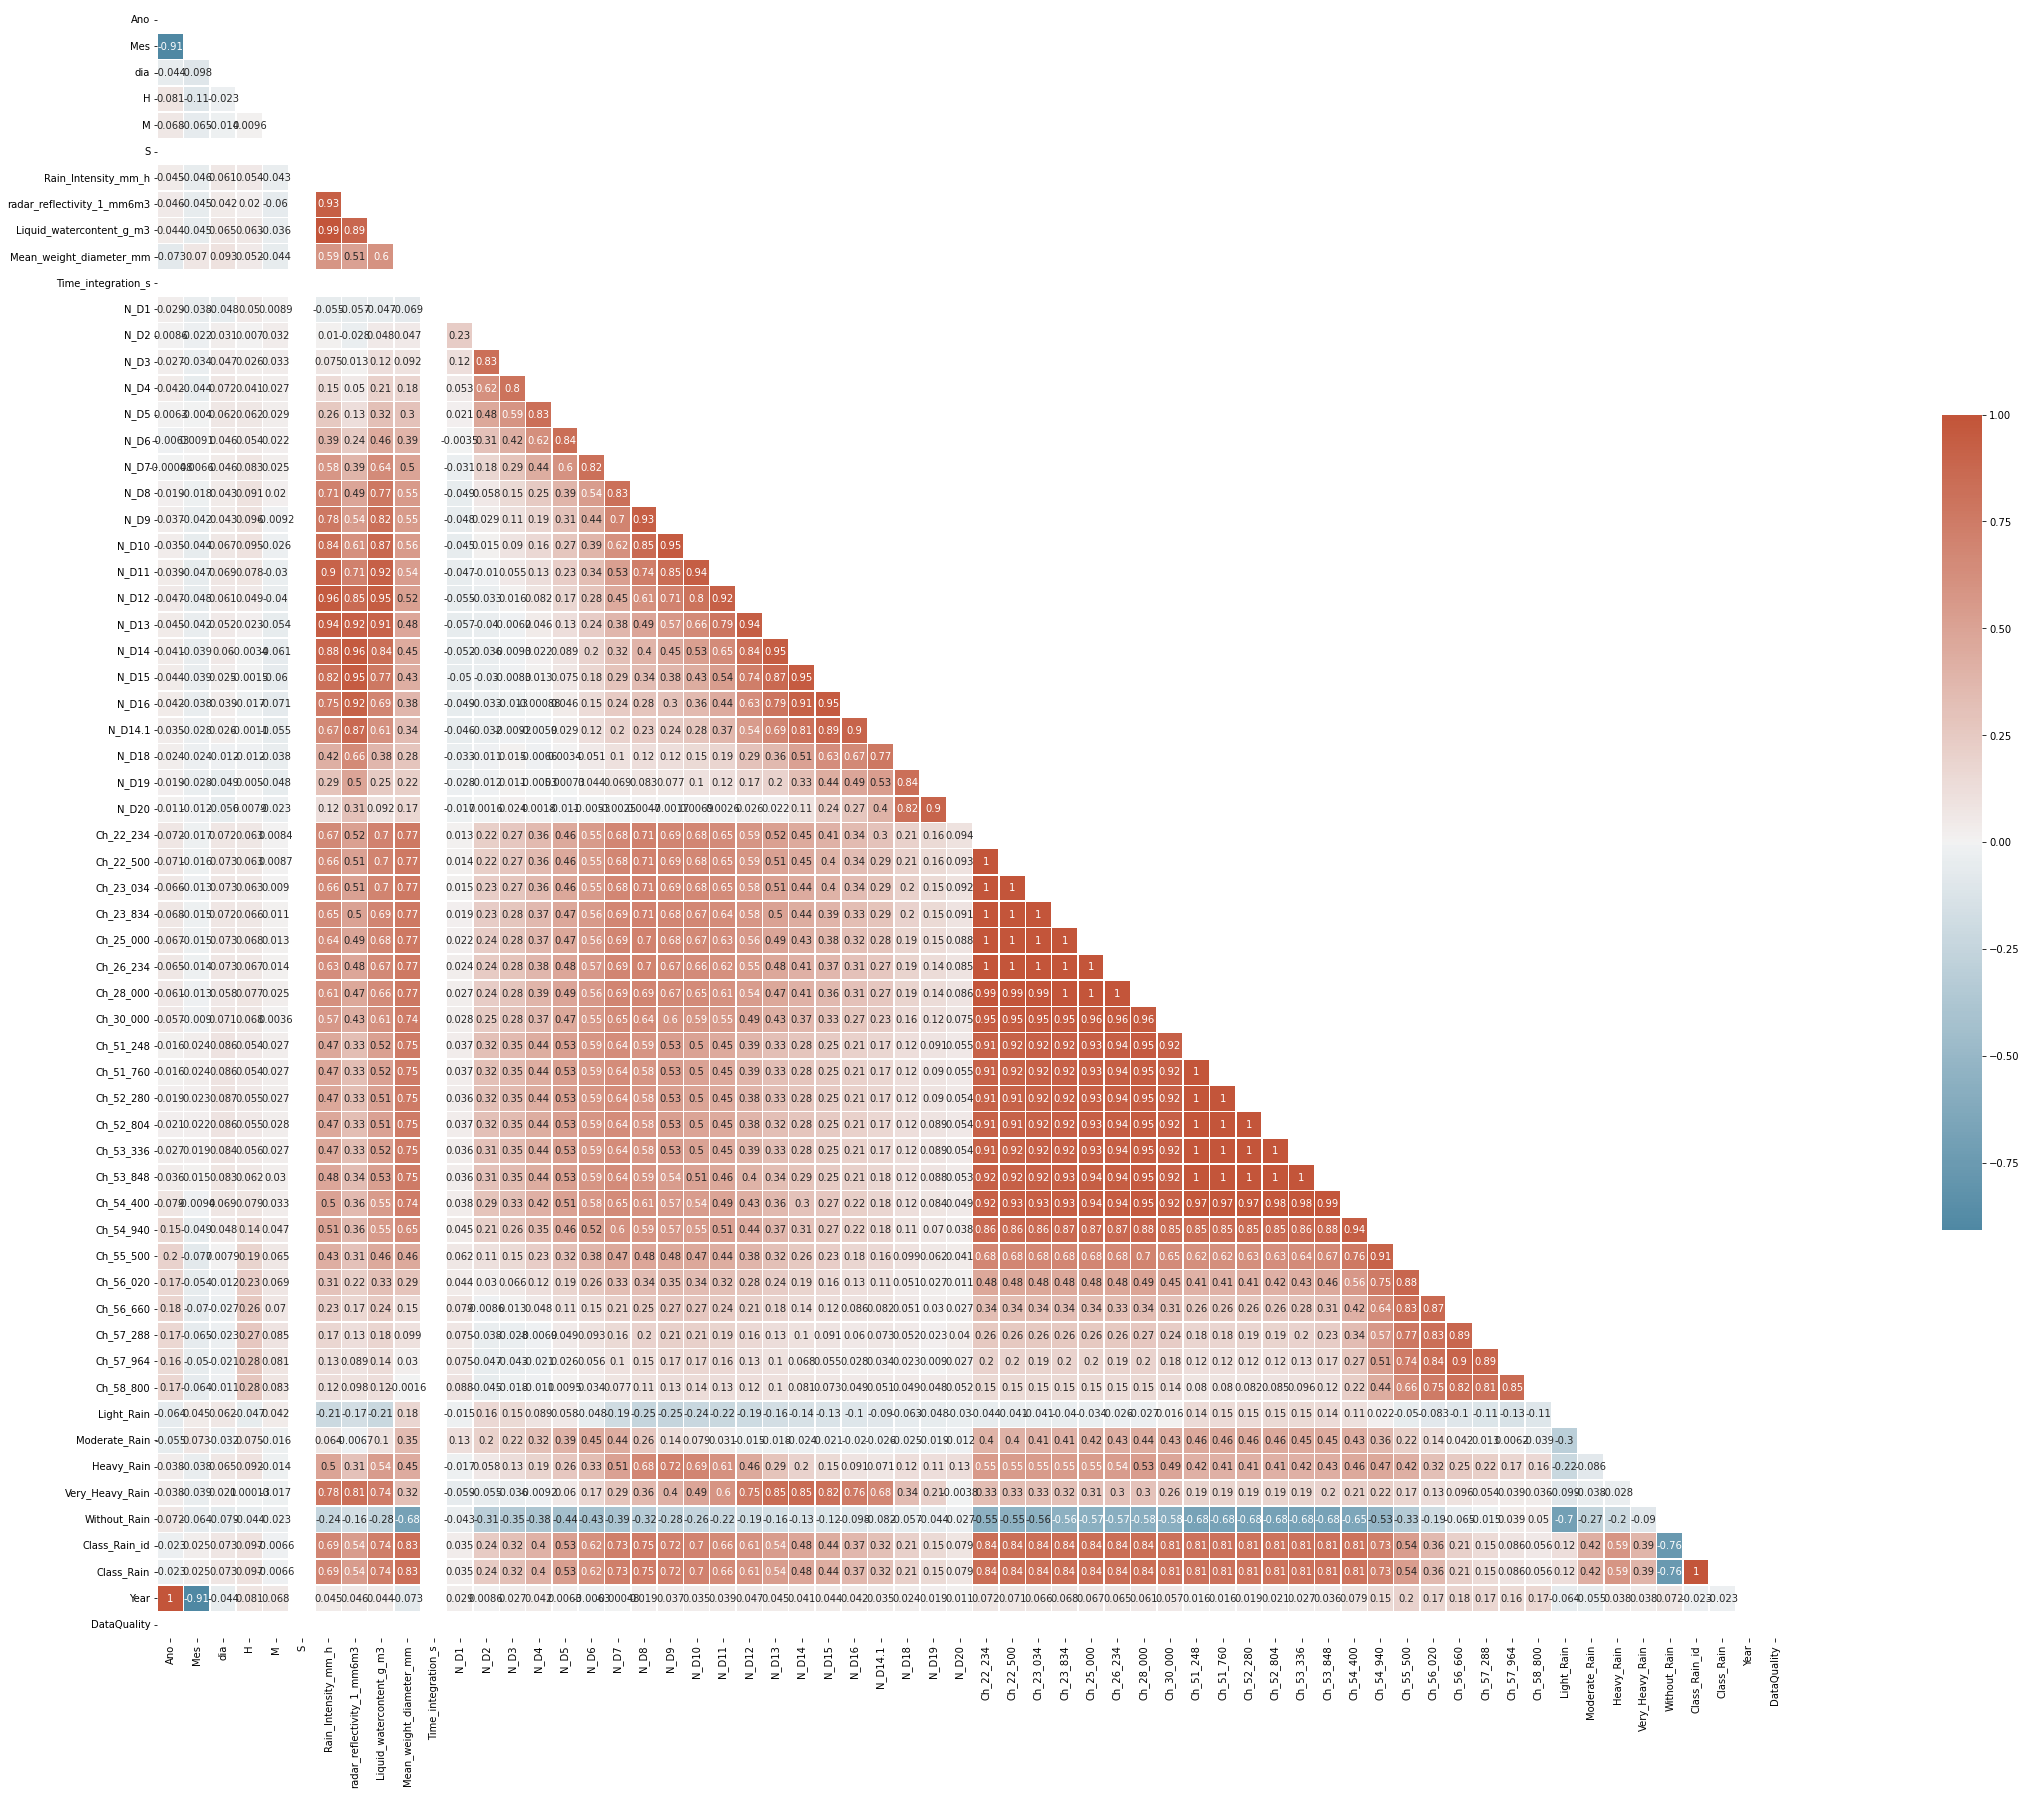

In [175]:
# Generate a mask for the upper triangle

corr = df_RD80_MP3000A_DataQuality.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(55, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

Vamos visualizar o gráfico da série temporal dos registros de chuva mm/h para todo o período dos dados, olhando apenas os registros de chuva. Ou seja, apenas onde variável Rain_Intensity_mm_h teve registros acima de 0.1mm/h.

In [176]:
df_RD80_MP3000A_DataQuality = df_RD80_MP3000A_DataQuality.reset_index()

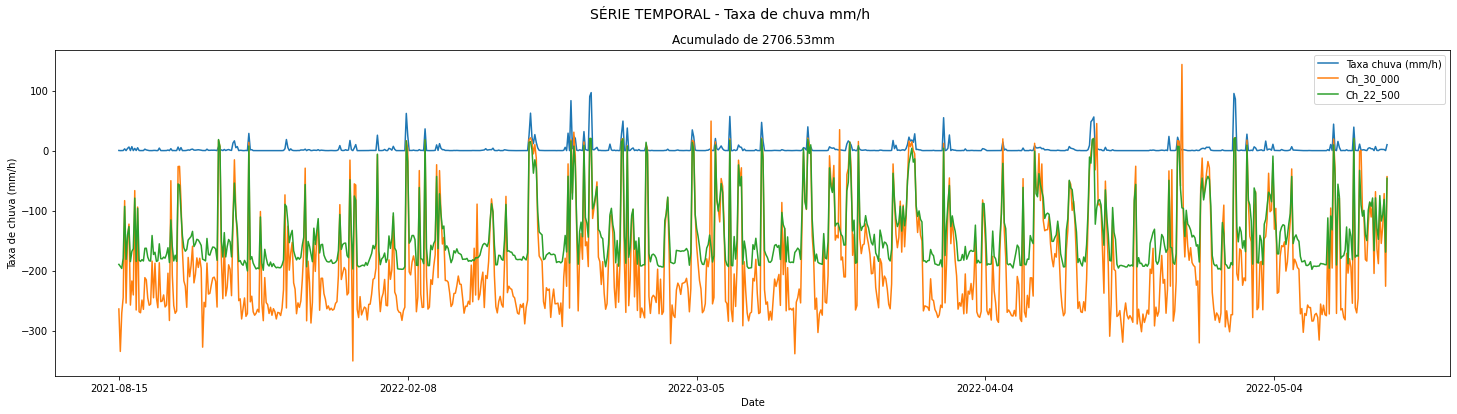

In [177]:
#Filtrando apenas onde houve registros de chuva

tot = round(df_RD80_MP3000A_DataQuality.Rain_Intensity_mm_h.sum(),2)
ax = plt.gca()
plt.rcParams["figure.figsize"] = [25,6]
plt.suptitle('SÉRIE TEMPORAL - Taxa de chuva mm/h', size=14)
plt.title('Acumulado de ' + str(tot)+'mm')
plt.ylabel("Taxa de chuva (mm/h)")
plt.xlabel("Mês do ano")
df_RD80_MP3000A_DataQuality.plot(kind="line",x="Date",y="Rain_Intensity_mm_h",label='Taxa chuva (mm/h)', ax=ax)
df_RD80_MP3000A_DataQuality.plot(kind="line",x="Date",y="Ch_30_000",label='Ch_30_000', ax=ax)
df_RD80_MP3000A_DataQuality.plot(kind="line",x="Date",y="Ch_22_500",label='Ch_22_500', ax=ax)
#plt.yscale('log')

Vamos visualizar o acumulado da intensidade da chuva para todo o período dos dados, olhando apenas os registros de chuva, usando como referência a variável Rain_Intensity_mm_h.

In [178]:
features_rna = ['Datetime', 'Rain_Intensity_mm_h', 'Ch_22_234', 'Ch_22_500',  'Ch_30_000']

df_multisensors_rna  = df_RD80_MP3000A_DataQuality[features_rna]

In [179]:
df_multisensors_rna['Datetime'] = pd.to_datetime(df_multisensors_rna['Datetime'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [180]:
df_multisensors_rna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Datetime             879 non-null    datetime64[ns]
 1   Rain_Intensity_mm_h  879 non-null    float64       
 2   Ch_22_234            879 non-null    float64       
 3   Ch_22_500            879 non-null    float64       
 4   Ch_30_000            879 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 34.5 KB


In [181]:
df_multisensors_rna_final = df_multisensors_rna.set_index('Datetime').resample('30T').pad()

In [182]:
df_multisensors_rna_final.head()

,Rain_Intensity_mm_h,Ch_22_234,Ch_22_500,Ch_30_000
Datetime,,,,
2021-08-15 15:00:00,NaN,NaN,NaN,NaN
2021-08-15 15:30:00,0.24632,-188.6,-189.5,-263.8
2021-08-15 16:00:00,0.24632,-188.6,-189.5,-263.8
2021-08-15 16:30:00,0.24632,-188.6,-189.5,-263.8
2021-08-15 17:00:00,0.24632,-188.6,-189.5,-263.8


In [183]:
#Removendo valores NaN
df_multisensors_rna_final = df_multisensors_rna_final.dropna(inplace = False, axis = 0) 

In [184]:
df_multisensors_rna_final.isna().sum()

Rain_Intensity_mm_h    0
Ch_22_234              0
Ch_22_500              0
Ch_30_000              0
dtype: int64

In [185]:
df_multisensors_rna_final.head()

,Rain_Intensity_mm_h,Ch_22_234,Ch_22_500,Ch_30_000
Datetime,,,,
2021-08-15 15:30:00,0.24632,-188.6,-189.5,-263.8
2021-08-15 16:00:00,0.24632,-188.6,-189.5,-263.8
2021-08-15 16:30:00,0.24632,-188.6,-189.5,-263.8
2021-08-15 17:00:00,0.24632,-188.6,-189.5,-263.8
2021-08-15 17:30:00,0.24632,-188.6,-189.5,-263.8


In [186]:
df_multisensors_rna_final = df_multisensors_rna_final.reset_index()
#df_multisensors_rna_final = df_multisensors_rna_final.set_index('Datetime')

In [187]:
df_multisensors_rna_final

,Datetime,Rain_Intensity_mm_h,Ch_22_234,Ch_22_500,Ch_30_000
0,2021-08-15 15:30:00,0.24632,-188.6,-189.5,-263.8
1,2021-08-15 16:00:00,0.24632,-188.6,-189.5,-263.8
2,2021-08-15 16:30:00,0.24632,-188.6,-189.5,-263.8
3,2021-08-15 17:00:00,0.24632,-188.6,-189.5,-263.8
4,2021-08-15 17:30:00,0.24632,-188.6,-189.5,-263.8
...,...,...,...,...,...
13878,2022-05-31 18:30:00,0.07105,-168.3,-169.1,-225.9
13879,2022-05-31 19:00:00,0.07105,-168.3,-169.1,-225.9
13880,2022-05-31 19:30:00,0.07105,-168.3,-169.1,-225.9
13881,2022-05-31 20:00:00,0.07105,-168.3,-169.1,-225.9


In [188]:
# Criando a coluna Data
df_multisensors_rna_final['Date'] = [d.date() for d in df_multisensors_rna_final['Datetime']]

In [189]:
# Criando a coluna hora do dia

df_multisensors_rna_final['Time'] = [d.time() for d in df_multisensors_rna_final['Datetime']]

In [190]:
# Criando a coluna hora do dia

df_multisensors_rna_final['Hour'] = [d.hour for d in df_multisensors_rna_final['Datetime']]

In [191]:
df_multisensors_rna_final

,Datetime,Rain_Intensity_mm_h,Ch_22_234,Ch_22_500,Ch_30_000,Date,Time,Hour
0,2021-08-15 15:30:00,0.24632,-188.6,-189.5,-263.8,2021-08-15,15:30:00,15
1,2021-08-15 16:00:00,0.24632,-188.6,-189.5,-263.8,2021-08-15,16:00:00,16
2,2021-08-15 16:30:00,0.24632,-188.6,-189.5,-263.8,2021-08-15,16:30:00,16
3,2021-08-15 17:00:00,0.24632,-188.6,-189.5,-263.8,2021-08-15,17:00:00,17
4,2021-08-15 17:30:00,0.24632,-188.6,-189.5,-263.8,2021-08-15,17:30:00,17
...,...,...,...,...,...,...,...,...
13878,2022-05-31 18:30:00,0.07105,-168.3,-169.1,-225.9,2022-05-31,18:30:00,18
13879,2022-05-31 19:00:00,0.07105,-168.3,-169.1,-225.9,2022-05-31,19:00:00,19
13880,2022-05-31 19:30:00,0.07105,-168.3,-169.1,-225.9,2022-05-31,19:30:00,19
13881,2022-05-31 20:00:00,0.07105,-168.3,-169.1,-225.9,2022-05-31,20:00:00,20


In [192]:
df_multisensors_rna_final = df_multisensors_rna_final.reindex(columns=['Datetime', 'Date', 'Time', 'Hour',
       'Ch_22_234', 'Ch_22_500', 'Ch_30_000', 'Rain_Intensity_mm_h'])

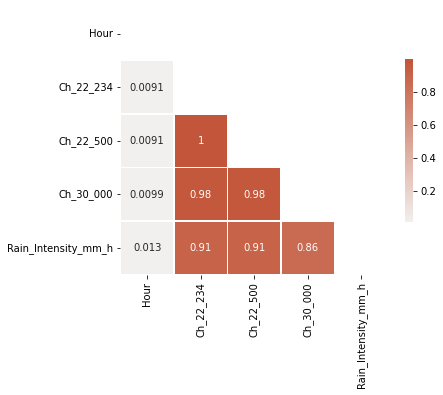

In [193]:
# Generate a mask for the upper triangle

corr = df_multisensors_rna_final.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


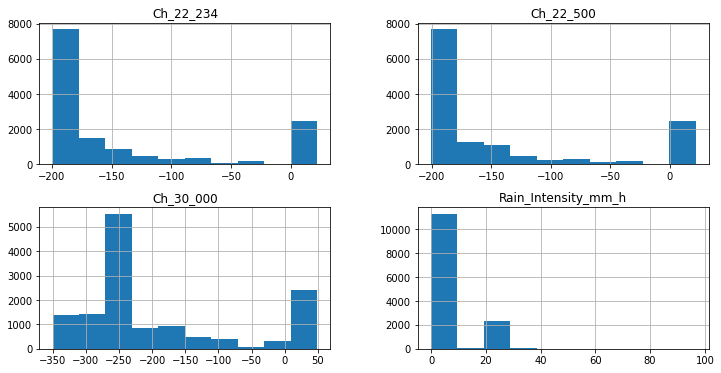

In [194]:
#Vamos plotar o gráfico em dados numéricos
df_numeric = df_multisensors_rna_final[['Ch_22_234',	'Ch_22_500',	'Ch_30_000',	'Rain_Intensity_mm_h']]
fig = plt.figure(figsize = (12,6))
ax = fig.gca()
df_numeric.loc[df_numeric['Rain_Intensity_mm_h'] > 0].hist(ax=ax)

plt.show()

In [195]:
df_multisensors_rna_final

,Datetime,Date,Time,Hour,Ch_22_234,Ch_22_500,Ch_30_000,Rain_Intensity_mm_h
0,2021-08-15 15:30:00,2021-08-15,15:30:00,15,-188.6,-189.5,-263.8,0.24632
1,2021-08-15 16:00:00,2021-08-15,16:00:00,16,-188.6,-189.5,-263.8,0.24632
2,2021-08-15 16:30:00,2021-08-15,16:30:00,16,-188.6,-189.5,-263.8,0.24632
3,2021-08-15 17:00:00,2021-08-15,17:00:00,17,-188.6,-189.5,-263.8,0.24632
4,2021-08-15 17:30:00,2021-08-15,17:30:00,17,-188.6,-189.5,-263.8,0.24632
...,...,...,...,...,...,...,...,...
13878,2022-05-31 18:30:00,2022-05-31,18:30:00,18,-168.3,-169.1,-225.9,0.07105
13879,2022-05-31 19:00:00,2022-05-31,19:00:00,19,-168.3,-169.1,-225.9,0.07105
13880,2022-05-31 19:30:00,2022-05-31,19:30:00,19,-168.3,-169.1,-225.9,0.07105
13881,2022-05-31 20:00:00,2022-05-31,20:00:00,20,-168.3,-169.1,-225.9,0.07105


In [196]:
#Add as colunas referente à intensidade da chuva. 
df_multisensors_rna_final=df_multisensors_rna_final.assign(Class_Rain='Não choveu')
convert_dict = {'Class_Rain':str}  
  
df_multisensors_rna_final = df_multisensors_rna_final.astype(convert_dict)

In [197]:
for index, row in df_multisensors_rna_final.iterrows():

    if (row['Rain_Intensity_mm_h'] > 0.1):
      df_multisensors_rna_final.loc[index,'Class_Rain'] = 'Choveu'


Vamos olhar como está a **Proporção de classes** do nosso Dataset

In [198]:
df_multisensors_rna_final['Class_Rain'].value_counts()

Choveu        8143
Não choveu    5740
Name: Class_Rain, dtype: int64

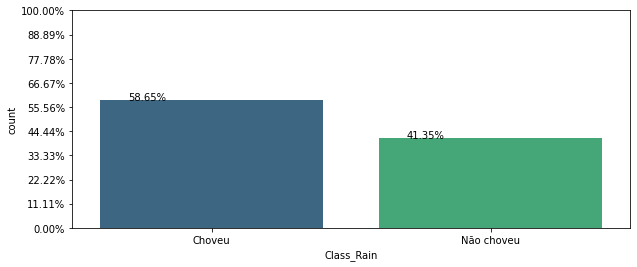

In [199]:
total = len(df_multisensors_rna_final)
plt.figure(figsize=(10,4))
ax = sns.countplot(x = 'Class_Rain', data = df_multisensors_rna_final, palette='viridis')
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
ax.yaxis.set_ticks(np.linspace(0, total, 10))
ax.set_yticklabels(map('{:.2f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

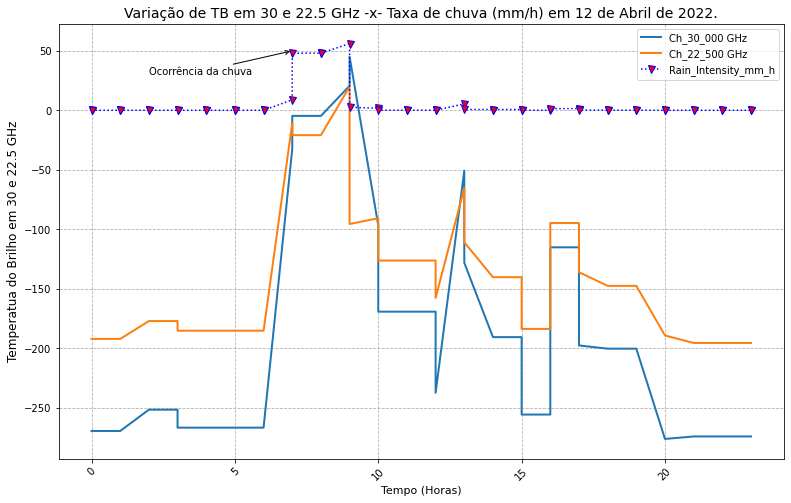

In [214]:
#Plotando o acumulado da intensidade da chuva por horário do dia
df_filter_multisensors_rna_test = df_multisensors_rna_final.query("(Datetime >= '2022-04-12 00:00:00' and Datetime <= '2022-04-12 23:59:59')")

ax = plt.gca()
plt.rcParams["figure.figsize"] = [13,8]

df_filter_multisensors_rna_test.plot(kind='line',x='Hour',y="Ch_30_000", label='Ch_30_000 GHz',linewidth = 2,linestyle='solid', ax=ax)
df_filter_multisensors_rna_test.plot(kind='line',x='Hour',y="Ch_22_500", label='Ch_22_500 GHz',linewidth = 2,linestyle='solid', ax=ax)
df_filter_multisensors_rna_test.plot(kind="line",x="Hour",y="Rain_Intensity_mm_h",label='Rain_Intensity_mm_h', linestyle='dotted', marker='v', color='b',markerfacecolor='r', markersize=7, ax=ax)


plt.annotate('Ocorrência da chuva', xy=(7, 50), arrowprops=dict(arrowstyle='->'), xytext=(2, 30))
plt.title('Variação de TB em 30 e 22.5 GHz -x- Taxa de chuva (mm/h) em 12 de Abril de 2022.', size=14)
plt.ylabel("Temperatua do Brilho em 30 e 22.5 GHz", size=12)
plt.xlabel("Tempo (Horas)" , size=11)
plt.xticks(rotation = 45)
plt.grid(False,linestyle='--')
plt.grid(True)

Conforme orientações para o projeto, para realizar o treinamento e validação do aprendizado de uma rede **Multi-layer Perceptron (MLP)**, realizou-se a divisão do conjunto de dados em dois grupos: Treino (70%) e Teste (30%). A biblioteca scikit-learn nos auxiliará nesta tarefa. 

In [201]:
# Preparando atributos de dados de escala

features_predict_rain = df_multisensors_rna_final.drop(['Datetime', 'Date','Time', 'Hour','Rain_Intensity_mm_h','Class_Rain'], axis=1) # Descarta colunas de destino e extras
target_predict_rain = df_multisensors_rna_final['Rain_Intensity_mm_h']

#Configura um scaler padrão para os recursos
col_names = list(features_predict_rain.columns)
s_scaler = preprocessing.StandardScaler()
features_predict_rain = s_scaler.fit_transform(features_predict_rain)
features_predict_rain = pd.DataFrame(features_predict_rain, columns=col_names) 

features_predict_rain.describe().T

,count,mean,std,min,25%,50%,75%,max
Ch_22_234,13883.0,-3.275570e-17,1.000036,-0.807408,-0.663472,-0.584840,0.300099,2.143279
Ch_22_500,13883.0,-3.111791e-16,1.000036,-0.807862,-0.663675,-0.590920,0.311239,2.128787
Ch_30_000,13883.0,8.188924e-18,1.000036,-1.328925,-0.602436,-0.545423,0.566339,2.122979


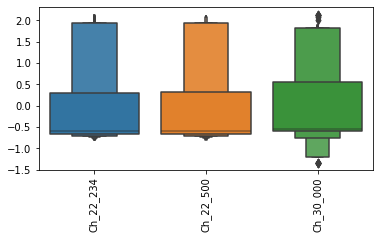

In [202]:
#Detecção de outliers
#Observando os recursos em escala

plt.figure(figsize=(6,3))
sns.boxenplot(data = features_predict_rain)
plt.xticks(rotation=90)
plt.show()

In [203]:
#Dividindo o dataset em treino e teste
x_train, x_test, y_train, y_test = train_test_split(target_predict_rain , features_predict_rain, test_size=0.24)
print('Tamanho do dataset para treinamento: ',len(x_train))
print('Tamanho do dataset para validação: ',len(x_test))

Tamanho do dataset para treinamento:  10551
Tamanho do dataset para validação:  3332


Após dividir o Dataset, inicialmente vamos checar o comportamento do dataset de Treino e de Teste da rede, para entender o que a rede buscará aprender e o que esta rede buscará prever.

In [204]:
x_test

8258      0.31726
6562     28.66925
3377      0.00470
9262      0.02244
7327     28.66925
           ...   
1178      0.24632
13796     2.09853
11311     0.00291
8366      1.93433
8456      0.02361
Name: Rain_Intensity_mm_h, Length: 3332, dtype: float64

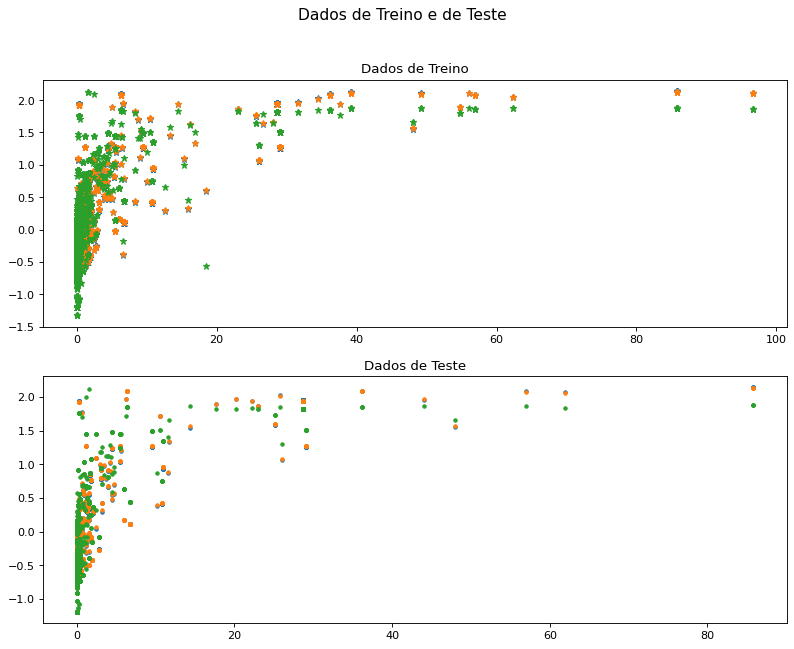

In [205]:
'''figure(figsize=(12,5),dpi=80)
plt.plot(x_train, y_train, '*', label="Dados para Treinamento")
plt.plot(x_test, y_test, '.', label="Dados para Teste")
plt.show()'''


figure(figsize=(12,9),dpi=80)
plt.suptitle('Dados de Treino e de Teste', size=14)

plt.subplot(2, 1, 1)
plt.title('Dados de Treino')
'''plt.xlabel("Epochs")
plt.ylabel("Loss")'''
plt.plot(x_train, y_train, '*', label="Dados para Treinamento")


plt.subplot(2, 1, 2)
plt.title('Dados de Teste')
'''plt.xlabel("Epochs")
plt.ylabel("Loss")'''
plt.plot(x_test, y_test, '.', label="Dados para Teste")


plt.show()

# **Aplicação de Redes Neurais para previsão de chuva a curtíssimo prazo usando dados de multisensores**
Com o objetivo de construir uma rede capaz de encontrar uma lei de regressão para o problema, serão criadas 05(cinco) topologias de rede MLP diferentes. Buscando melhores resultados nos experimentos e testes, serão criadas 05(cinco) topologias de rede MLP diferentes, nas quais terão o número de camadas e o número de neurônios modificados em cada topologia.

## **Configurações**

* Momentum
* Regularização (L2)
* Épocas (epochs)

Antes de iniciarmos a estruturação das Topologias, vamos definir os valores para configurações dos **Hiperparâmetros do Momentum** e **Regularização (L2)** para avaliar seus impactos, e quantidade de épocas (**epochs**) para os treinos.

In [206]:
#Configurações para avaliar o impacto do uso do Momentum e da Regularização (L2)
momentum =    [0.0, 0.2, 0.6, 0.9]
regularizer = [0.0, 0.2, 0.1, 0.0]
dropout = [0.0, 0.0, 0.0, 0.0]

#Define a quantidade de épocas para o treinamento
epochs = 100 

## **Definições da Topologia**

A rede neural que será criada será uma MLP com 6 camadas, sendo:
*   01 camada de entrada (input layer) com 50 Neurônios
*   01 camada escondida (hidden layer) com 50 Neurônios
*   01 camada escondida (hidden layer) com 20 Neurônios
*   01 camada escondida (hidden layer) com 10 Neurônios
*   01 camada escondida (hidden layer) com 5 Neurônios
*   01 camada de saída (output layer) com 1 Neurônio

**Criação dos Modelos**

In [207]:
#Modelos da Topologia IV
mdl_tpl_IV = []

for res in range(0,4):
  #print(i)
  sgd = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=momentum[res])
  mdl_tpl_IV.append(keras.Sequential())
  mdl_tpl_IV[res].add(keras.layers.Dense(units=50,  kernel_regularizer=l2(regularizer[res]), input_shape=[1], activation="tanh"))
  mdl_tpl_IV[res].add(keras.layers.Dense(units=50,  kernel_regularizer=l2(regularizer[res]), activation="tanh"))
  mdl_tpl_IV[res].add(keras.layers.Dense(units=20,  kernel_regularizer=l2(regularizer[res]), activation="tanh"))
  mdl_tpl_IV[res].add(keras.layers.Dense(units=10,  kernel_regularizer=l2(regularizer[res]), activation="tanh"))
  mdl_tpl_IV[res].add(keras.layers.Dense(units=5,  kernel_regularizer=l2(regularizer[res]), activation="tanh"))
  mdl_tpl_IV[res].add(keras.layers.Dense(units=1, activation="linear"))
  #tf.keras.utils.plot_model(mdl_tpl_IV[res], show_shapes=True)
  mdl_tpl_IV[res].compile(loss='mean_squared_error', optimizer=sgd, metrics=["mean_absolute_error", 'mean_squared_error'])
  

**Agora vamos treinar os Modelos criados**

In [208]:
early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)

history_mdl_tpl_IV = []
for res in range(0,4):
  history_mdl_tpl_IV.append(mdl_tpl_IV[res].fit(x_train, y_train, epochs=epochs, batch_size=32, validation_split=0.2, verbose=True)) #callbacks=[early]


Epoch 1/100
264/264 [==============================] - 2s 4ms/step - loss: 0.1274 - mean_absolute_error: 0.2298 - mean_squared_error: 0.1274 - val_loss: 0.1078 - val_mean_absolute_error: 0.2192 - val_mean_squared_error: 0.1078
Epoch 2/100
264/264 [==============================] - 1s 3ms/step - loss: 0.1086 - mean_absolute_error: 0.2144 - mean_squared_error: 0.1086 - val_loss: 0.1075 - val_mean_absolute_error: 0.2150 - val_mean_squared_error: 0.1075
Epoch 3/100
264/264 [==============================] - 1s 3ms/step - loss: 0.1076 - mean_absolute_error: 0.2141 - mean_squared_error: 0.1076 - val_loss: 0.1062 - val_mean_absolute_error: 0.2139 - val_mean_squared_error: 0.1062
Epoch 4/100
264/264 [==============================] - 1s 3ms/step - loss: 0.1075 - mean_absolute_error: 0.2146 - mean_squared_error: 0.1075 - val_loss: 0.1073 - val_mean_absolute_error: 0.2228 - val_mean_squared_error: 0.1073
Epoch 5/100
264/264 [==============================] - 1s 3ms/step - loss: 0.1071 - mean_abs

**Resultados do Treinamento**

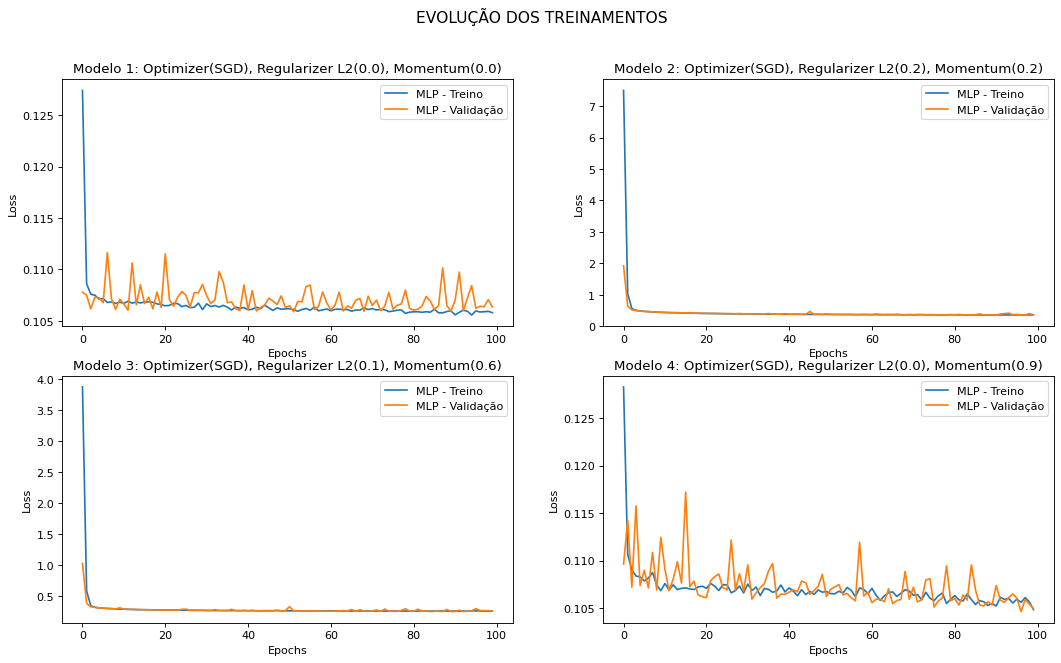

In [209]:
figure(figsize=(16,9),dpi=80)
plt.suptitle('EVOLUÇÃO DOS TREINAMENTOS', size=14)
for res in range(0,4):
    plt.subplot(2,2,res+1)
    plt.title('Modelo '+ str(res+1) + ': Optimizer(SGD), Regularizer L2('+str(regularizer[res])+'), Momentum('+str(momentum[res])+')')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(history_mdl_tpl_IV[res].history['loss'], label="MLP - Treino")
    plt.plot(history_mdl_tpl_IV[res].history['val_loss'], label="MLP - Validação")
    plt.legend()
plt.show()

**Avaliação**

330/330 [==============================] - 0s 1ms/step


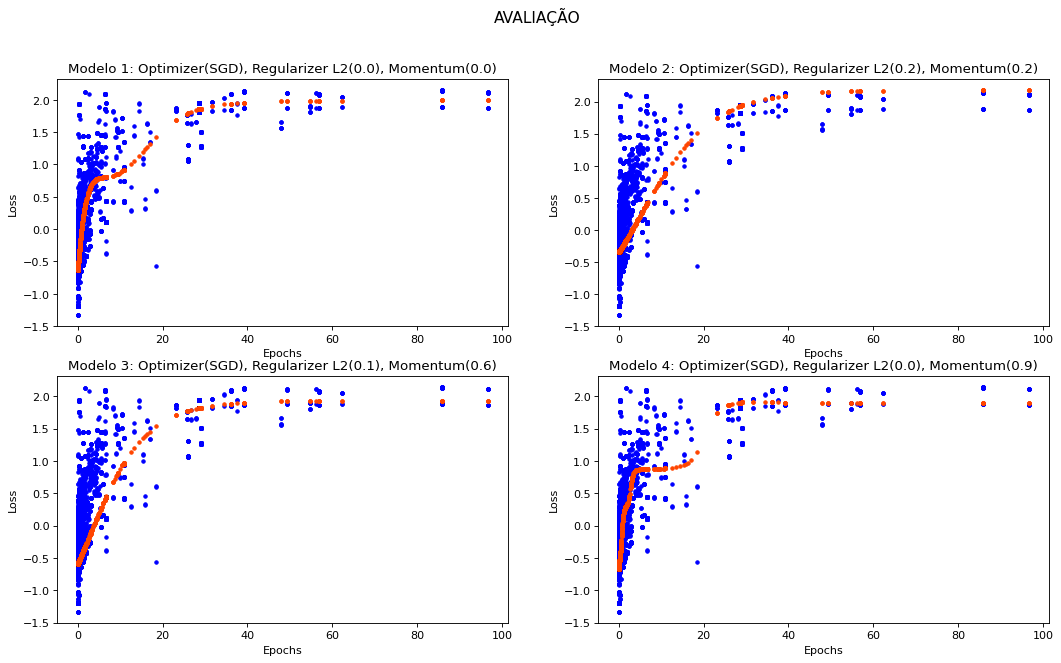

In [216]:
figure(figsize=(16,9),dpi=80)
plt.suptitle('AVALIAÇÃO', size=14)

for res in range(0,4):

  plt.subplot(2,2,res+1)
  y_rest = mdl_tpl_IV[res].predict(x_train)
  plt.plot(x_train, y_train, '.', color='b')
  plt.plot(x_train, y_rest, '.',color='#FF4500')
  plt.title('Modelo '+ str(res+1) + ': Optimizer(SGD), Regularizer L2('+str(regularizer[res])+'), Momentum('+str(momentum[res])+')')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")

plt.show()

105/105 [==============================] - 0s 1ms/step


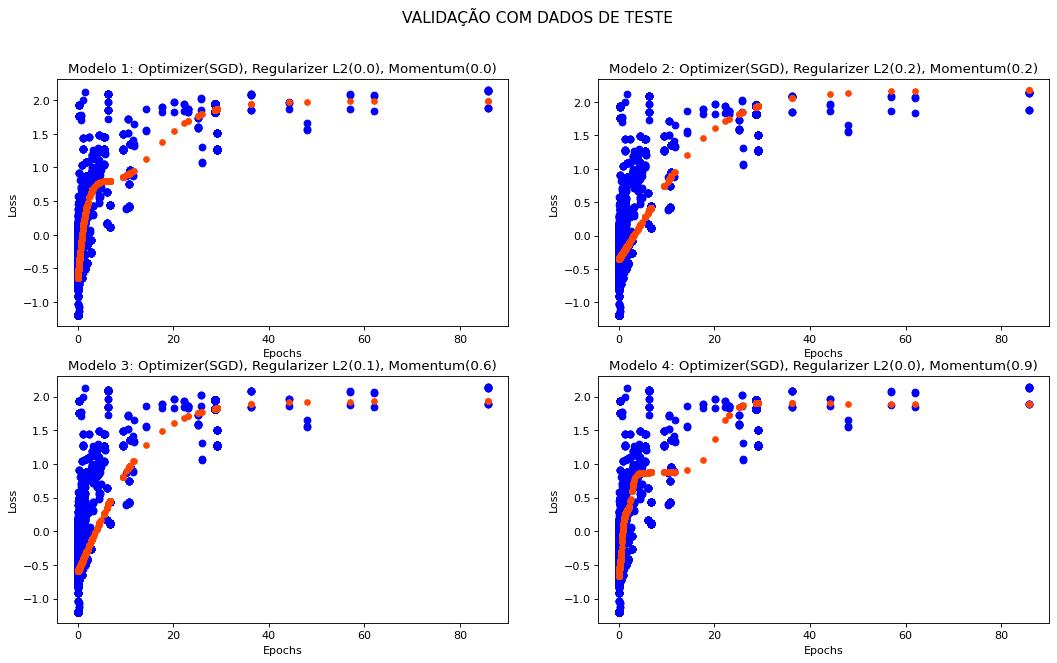

105/105 [==============================] - 0s 2ms/step - loss: 0.1107 - mean_absolute_error: 0.2036 - mean_squared_error: 0.1107


In [217]:
figure(figsize=(16,9),dpi=80)
plt.suptitle('VALIDAÇÃO COM DADOS DE TESTE', size=14)
for res in range(0,4):

  plt.subplot(2,2,res+1)
  y_rest = mdl_tpl_IV[res].predict(x_test)
  plt.plot(x_test, y_test, 'o', color='b')
  plt.plot(x_test, y_rest,'.', markersize=10 ,color='#FF4500')
  plt.title('Modelo '+ str(res+1) + ': Optimizer(SGD), Regularizer L2('+str(regularizer[res])+'), Momentum('+str(momentum[res])+')')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")

plt.show()


for res in range(0,4):
  test_loss = mdl_tpl_IV[res].evaluate(x_test, y_test)

In [212]:
score_mdl_tpl_IV = []
for res in range(0,4): 
  score_mdl_tpl_IV.append(mdl_tpl_IV[res].evaluate(x_test, y_test, verbose=0))
  print('Modelo '+ str(res+1) + ': Optimizer(SGD), Regularizer L2('+str(regularizer[res])+'), Momentum('+str(momentum[res])+')')
  print('Teste loss:',   score_mdl_tpl_IV[res][0])
  print('Teste métricas:', score_mdl_tpl_IV[res][1])
  print('----------------------------------------')

Modelo 1: Optimizer(SGD), Regularizer L2(0.0), Momentum(0.0)
Teste loss: 0.11142060160636902
Teste métricas: 0.2145620584487915
----------------------------------------
Modelo 2: Optimizer(SGD), Regularizer L2(0.2), Momentum(0.2)
Teste loss: 0.35903769731521606
Teste métricas: 0.3088214099407196
----------------------------------------
Modelo 3: Optimizer(SGD), Regularizer L2(0.1), Momentum(0.6)
Teste loss: 0.26374363899230957
Teste métricas: 0.22861139476299286
----------------------------------------
Modelo 4: Optimizer(SGD), Regularizer L2(0.0), Momentum(0.9)
Teste loss: 0.11068624258041382
Teste métricas: 0.20357419550418854
----------------------------------------


In [213]:
print(score_mdl_tpl_IV)

[[0.11142060160636902, 0.2145620584487915, 0.11142060160636902], [0.35903769731521606, 0.3088214099407196, 0.17161983251571655], [0.26374363899230957, 0.22861139476299286, 0.15584009885787964], [0.11068624258041382, 0.20357419550418854, 0.11068624258041382]]




---



#  **Considerações Finais**

As redes MLP são uma boa opção para ser aplicada em problemas de classificação e de regressão. Com base nos históricos obtidos nos treinamentos e testes em cada uma das topologias, aplicando a variação nos hyperparâmetros, número de camadas e números de neurônios, foi  possível visualizar qual a melhor configuração e melhor modelo para ser apicado ao problema em questão.

# **Referências**

BASHEER, I. A.; HAJMEER, M. Artificial neural networks: fundamentals, computing, design, and application. Journal of Microbiological Methods, v. 43, p. 3–31, 2000

HAYKIN, Simon. Redes Neurais : princípios e prática. Traduzido por Paulo Martins Engel. 2. ed. Porto Alegre : Bookman, 2001. 900 p. il.

HSU, K. L.; GAO, X.; SOROOSHIAN, S.; GUPTA, H. V. Precipitation estimation from remotely sensed information using artificial neural networks. Journal of Applied Meteorology, v. 36, n. 9, p. 1176-1190, 1997.

https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

https://sites.icmc.usp.br/andre/research/neural/MLP.htm

KOVAKS, Z. L. Redes Neurais Artificiais: fundamentos e Aplicações. São Paulo: Acadêmica, 1996.

TAFNER, Malcon A.; XEREZ, Marcos de; RODRIGUES FILHO, Ilson W. Redes neurais artificiais : introdução e princípios de neurocomputação. Blumenau : Eko, 1995.

Hinton, Geoffrey, Nitish Srivastava, and Kevin Swersky. “Neural Networks for Machine Learning Lecture 6a Overview of Mini--Batch Gradient Descent,” 2012.
